In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10,6)
pd.set_option('display.precision', 2)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 60)

### 1. Dataset

In [2]:
movies = pd.read_csv('movies.csv')
movies

,index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
0,1.0,The Godfather,(1972),R,175 min,"Crime, Drama",9.2,"1,860,471",$134.97M
1,2.0,The Silence of the Lambs,(1991),R,118 min,"Crime, Drama, Thriller",8.6,"1,435,344",$130.74M
2,3.0,Star Wars: Episode V - The Empire Strikes Back,(1980),PG,124 min,"Action, Adventure, Fantasy",8.7,"1,294,805",$290.48M
3,4.0,The Shawshank Redemption,(1994),R,142 min,Drama,9.3,"2,683,302",$28.34M
4,5.0,The Shining,(1980),R,146 min,"Drama, Horror",8.4,"1,025,560",$44.02M
...,...,...,...,...,...,...,...,...,...
94,95.0,The Usual Suspects,(1995),R,106 min,"Crime, Drama, Mystery",8.5,"1,087,832",$23.34M
95,96.0,Cool Hand Luke,(1967),GP,127 min,"Crime, Drama",8.1,"178,888",$16.22M
96,97.0,Eternal Sunshine of the Spotless Mind,(2004),R,108 min,"Drama, Romance, Sci-Fi",8.3,"1,011,004",$34.40M
97,98.0,City Lights,(1931),G,87 min,"Comedy, Drama, Romance",8.5,"186,059",$0.02M


### 2. Data overview

In [3]:
# Check for data types
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            99 non-null     float64
 1   movie_name       99 non-null     object 
 2   year_of_release  99 non-null     object 
 3   category         99 non-null     object 
 4   run_time         99 non-null     object 
 5   genre            99 non-null     object 
 6   imdb_rating      99 non-null     float64
 7   votes            99 non-null     object 
 8   gross_total      98 non-null     object 
dtypes: float64(2), object(7)
memory usage: 7.1+ KB


In [4]:
# Description of numerical variables
movies.describe()

,index,imdb_rating
count,99.00,99.00
mean,50.00,8.35
std,28.72,0.37
min,1.00,7.20
25%,25.50,8.10
50%,50.00,8.30
75%,74.50,8.60
max,99.00,9.30


In [5]:
# Check for null values
movies.isna().sum()

index              0
movie_name         0
year_of_release    0
category           0
run_time           0
genre              0
imdb_rating        0
votes              0
gross_total        1
dtype: int64

In [9]:
# This function help us to determine where is/are the na
movies.query('gross_total.isna()')

,index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
65,66.0,To Have and Have Not,(1944),Passed,100 min,"Adventure, Comedy, Film-Noir",7.8,"35,528",NaN


In [8]:
# Check for duplicated values
movies.duplicated().sum()

0

In [6]:
movies

,index,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
0,1.0,The Godfather,(1972),R,175 min,"Crime, Drama",9.2,"1,860,471",$134.97M
1,2.0,The Silence of the Lambs,(1991),R,118 min,"Crime, Drama, Thriller",8.6,"1,435,344",$130.74M
2,3.0,Star Wars: Episode V - The Empire Strikes Back,(1980),PG,124 min,"Action, Adventure, Fantasy",8.7,"1,294,805",$290.48M
3,4.0,The Shawshank Redemption,(1994),R,142 min,Drama,9.3,"2,683,302",$28.34M
4,5.0,The Shining,(1980),R,146 min,"Drama, Horror",8.4,"1,025,560",$44.02M
...,...,...,...,...,...,...,...,...,...
94,95.0,The Usual Suspects,(1995),R,106 min,"Crime, Drama, Mystery",8.5,"1,087,832",$23.34M
95,96.0,Cool Hand Luke,(1967),GP,127 min,"Crime, Drama",8.1,"178,888",$16.22M
96,97.0,Eternal Sunshine of the Spotless Mind,(2004),R,108 min,"Drama, Romance, Sci-Fi",8.3,"1,011,004",$34.40M
97,98.0,City Lights,(1931),G,87 min,"Comedy, Drama, Romance",8.5,"186,059",$0.02M


### 3. Transforming and adjusting data

In [17]:
# We can remove the index column and the parentheses from the 'year_of_release' column. 
# Additionally, we need to remove the word 'min' from the 'run_time' column, convert year_of_realese to date
# and convert the 'votes' and 'gross' columns from characters to numbers.
movies.drop(columns='index', inplace=True)
movies['year_of_release'] = (movies['year_of_release']
                             .str.replace("(", "", regex=True)
                             .str.replace(")", "", regex=True))
movies['run_time'] = (movies['run_time']
                      .str.replace(' min', "", regex=True)
                      .astype(int))
movies['year_of_release'] = pd.to_datetime(movies['year_of_release'])       
movies['gross_total'] = (movies['gross_total']
                         .str.replace('$', "", regex=True)
                         .str.replace('M', "", regex=True)
                         .astype(float) )
movies['votes'] = movies['votes'].str.replace(',', "").astype(int)
    
movies

,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
0,The Godfather,1972,R,175,"Crime, Drama",9.2,1860471,134.97
1,The Silence of the Lambs,1991,R,118,"Crime, Drama, Thriller",8.6,1435344,130.74
2,Star Wars: Episode V - The Empire Strikes Back,1980,PG,124,"Action, Adventure, Fantasy",8.7,1294805,290.48
3,The Shawshank Redemption,1994,R,142,Drama,9.3,2683302,28.34
4,The Shining,1980,R,146,"Drama, Horror",8.4,1025560,44.02
...,...,...,...,...,...,...,...,...
94,The Usual Suspects,1995,R,106,"Crime, Drama, Mystery",8.5,1087832,23.34
95,Cool Hand Luke,1967,GP,127,"Crime, Drama",8.1,178888,16.22
96,Eternal Sunshine of the Spotless Mind,2004,R,108,"Drama, Romance, Sci-Fi",8.3,1011004,34.40
97,City Lights,1931,G,87,"Comedy, Drama, Romance",8.5,186059,0.02


In [19]:
# This is step is not absolutely necessary, but we can convert the years to datetime
movies['year_of_release'] = pd.to_datetime(movies['year_of_release'])

In [21]:
# Now we can check the data types again
movies.dtypes

movie_name                 object
year_of_release    datetime64[ns]
category                   object
run_time                    int32
genre                      object
imdb_rating               float64
votes                       int32
gross_total               float64
dtype: object

### 4. Data Analisys

In [22]:
# Let's check the variables correlation
movies_corr = movies.corr()
movies_corr

,run_time,imdb_rating,votes,gross_total
run_time,1.00,0.29,0.33,0.26
imdb_rating,0.29,1.00,0.73,0.13
votes,0.33,0.73,1.00,0.46
gross_total,0.26,0.13,0.46,1.00


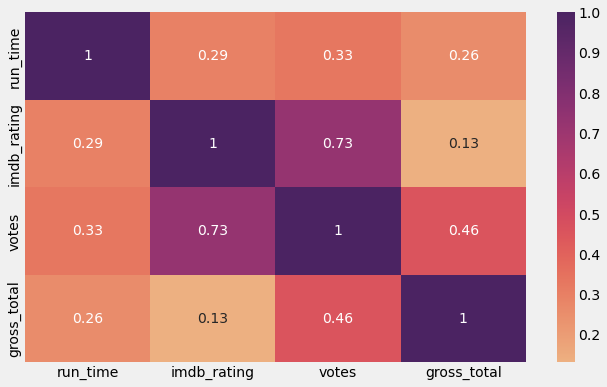

In [29]:
sns.heatmap(movies_corr, annot=True, cmap="flare");
# The higher correlation is between imdb_rating and votes. The other correlations are very weak

### 4.1 Rating and votes

In [32]:
# Let's check the movies by imdb_rating and votes
(movies
     .sort_values(by=['imdb_rating', 'votes'], 
                  ascending=False)
                 .head(15))

,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
3,The Shawshank Redemption,1994-01-01,R,142,Drama,9.3,2683302,28.34
0,The Godfather,1972-01-01,R,175,"Crime, Drama",9.2,1860471,134.97
10,The Dark Knight,2008-01-01,PG-13,152,"Action, Crime, Drama",9.0,2656768,534.86
8,The Lord of the Rings: The Return of the King,2003-01-01,PG-13,201,"Action, Adventure, Drama",9.0,1849082,377.85
13,Schindler's List,1993-01-01,R,195,"Biography, Drama, History",9.0,1357621,96.90
11,The Godfather: Part II,1974-01-01,R,202,"Crime, Drama",9.0,1273349,57.30
21,12 Angry Men,1957-01-01,Approved,96,"Crime, Drama",9.0,792729,4.36
28,Pulp Fiction,1994-01-01,R,154,"Crime, Drama",8.9,2058574,107.93
14,Inception,2010-01-01,PG-13,148,"Action, Adventure, Sci-Fi",8.8,2356293,292.58
55,Fight Club,1999-01-01,R,139,Drama,8.8,2128902,37.03


In [34]:
# The most common rating are 8.5, 8.2 and 8.3
movies['imdb_rating'].value_counts()

8.5    13
8.2    13
8.3    12
8.4     9
8.1     8
8.6     8
8.8     6
9.0     5
8.0     5
8.7     4
7.8     4
7.9     4
7.7     3
7.2     1
9.2     1
8.9     1
9.3     1
7.5     1
Name: imdb_rating, dtype: int64

In [38]:
# There is an interesting information about gross total. It seems that not the best rating movies have a 
# big gross total
movies.sort_values(by='gross_total', ascending=False).head(15)

,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
79,Star Wars: Episode VII - The Force Awakens,2015-01-01,PG-13,138,"Action, Adventure, Sci-Fi",7.8,933771,936.66
10,The Dark Knight,2008-01-01,PG-13,152,"Action, Crime, Drama",9.0,2656768,534.86
78,The Dark Knight Rises,2012-01-01,PG-13,164,"Action, Drama",8.4,1708002,448.14
30,The Lion King,1994-01-01,G,88,"Animation, Adventure, Drama",8.5,1060900,422.78
8,The Lord of the Rings: The Return of the King,2003-01-01,PG-13,201,"Action, Adventure, Drama",9.0,1849082,377.85
22,The Lord of the Rings: The Two Towers,2002-01-01,PG-13,179,"Action, Adventure, Drama",8.8,1669715,342.55
40,Forrest Gump,1994-01-01,PG-13,142,"Drama, Romance",8.8,2082477,330.25
9,Star Wars: Episode IV - A New Hope,1977-01-01,PG,121,"Action, Adventure, Fantasy",8.6,1367430,322.74
15,The Lord of the Rings: The Fellowship of the Ring,2001-01-01,PG-13,178,"Action, Adventure, Drama",8.8,1878557,315.54
24,Star Wars: Episode VI - Return of the Jedi,1983-01-01,PG,131,"Action, Adventure, Fantasy",8.3,1056750,309.13


In [48]:
# Now we can calculate the mean of rating for the movies with a gross total higher than 200.0 millions
movies.query('gross_total > 200.0')['imdb_rating'].mean()

8.527777777777779

### 4.2 Movies Category

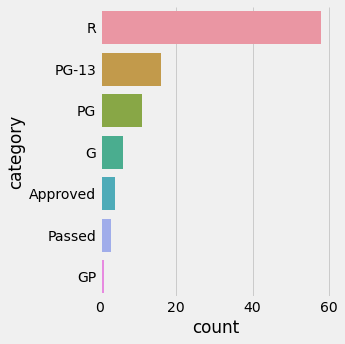

In [50]:
# Let's see what happen with the movies category
# Most of the movies are in the R category
sns.catplot(data=movies, 
            y='category', 
            kind='count',
           order=movies['category'].value_counts().index);

In [56]:
# It seems that movies with R category have good ratings
(movies[movies['category'] == "R"]
     .sort_values(by='imdb_rating', 
                  ascending=False)
     .head(10))

,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
3,The Shawshank Redemption,1994-01-01,R,142,Drama,9.3,2683302,28.34
0,The Godfather,1972-01-01,R,175,"Crime, Drama",9.2,1860471,134.97
13,Schindler's List,1993-01-01,R,195,"Biography, Drama, History",9.0,1357621,96.90
11,The Godfather: Part II,1974-01-01,R,202,"Crime, Drama",9.0,1273349,57.30
28,Pulp Fiction,1994-01-01,R,154,"Crime, Drama",8.9,2058574,107.93
55,Fight Club,1999-01-01,R,139,Drama,8.8,2128902,37.03
36,Goodfellas,1990-01-01,R,145,"Biography, Crime, Drama",8.7,1164128,46.84
98,The Matrix,1999-01-01,R,136,"Action, Sci-Fi",8.7,1916083,171.48
6,One Flew Over the Cuckoo's Nest,1975-01-01,R,133,Drama,8.7,1010102,112.00
1,The Silence of the Lambs,1991-01-01,R,118,"Crime, Drama, Thriller",8.6,1435344,130.74


In [65]:
# To be sure, we can calculte the mean of all categories
# and the data shows that Approved category has the higher mean rating
(movies
     .groupby('category')
     .mean()
     .sort_values(by='imdb_rating', 
                  ascending=False))

,run_time,imdb_rating,votes,gross_total
category,,,,
Approved,125.75,8.55,5.15e+05,6.05
PG-13,149.12,8.42,1.37e+06,293.59
PG,123.27,8.38,7.88e+05,144.87
G,104.17,8.37,5.25e+05,115.86
R,134.02,8.33,9.64e+05,73.41
GP,127.00,8.10,1.79e+05,16.22
Passed,153.00,8.07,2.07e+05,111.84


### 4.3 Movies run time

In [68]:
# Let's check the movies by run time
movies.sort_values(by='run_time', ascending=False).head(10)

,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
26,Gone with the Wind,1939-01-01,Passed,238,"Drama, Romance, War",8.2,317621,198.68
11,The Godfather: Part II,1974-01-01,R,202,"Crime, Drama",9.0,1273349,57.30
8,The Lord of the Rings: The Return of the King,2003-01-01,PG-13,201,"Action, Adventure, Drama",9.0,1849082,377.85
13,Schindler's List,1993-01-01,R,195,"Biography, Drama, History",9.0,1357621,96.90
77,Magnolia,1999-01-01,R,188,Drama,8.0,315037,22.46
22,The Lord of the Rings: The Two Towers,2002-01-01,PG-13,179,"Action, Adventure, Drama",8.8,1669715,342.55
49,"The Good, the Bad and the Ugly",1966-01-01,Approved,178,"Adventure, Western",8.8,763678,6.10
42,Braveheart,1995-01-01,R,178,"Biography, Drama, History",8.4,1040416,75.60
15,The Lord of the Rings: The Fellowship of the Ring,2001-01-01,PG-13,178,"Action, Adventure, Drama",8.8,1878557,315.54
0,The Godfather,1972-01-01,R,175,"Crime, Drama",9.2,1860471,134.97


In [71]:
# We can consider a movie as long if it has a duration of more than 150 minutes. 
# Let's see how many of this type are in the dataset
# We have 23 movies
movies.query('run_time >= 150').count()

movie_name         23
year_of_release    23
category           23
run_time           23
genre              23
imdb_rating        23
votes              23
gross_total        23
dtype: int64

In [76]:
# These are the movies and we can check their rating
(movies
     .query('run_time >= 150')
     .groupby('genre')['imdb_rating']
     .mean()
     .sort_values(ascending=False))

genre
Crime, Drama                  9.03
Action, Adventure, Drama      8.87
Adventure, Western            8.80
Biography, Drama, History     8.70
Action, Crime, Drama          8.65
Adventure, Drama, Sci-Fi      8.60
Drama, War                    8.60
Biography, Drama, Music       8.50
Crime, Drama, Thriller        8.50
Action, Drama                 8.40
Drama, Western                8.40
Adventure, Drama, War         8.25
Drama, Romance, War           8.20
Drama                         8.00
Adventure, Fantasy            7.80
Biography, Drama, Thriller    7.80
Name: imdb_rating, dtype: float64

In [77]:
# And their gross total
(movies
     .query('run_time >= 150')
     .groupby('genre')['gross_total']
     .mean()
     .sort_values(ascending=False))

genre
Action, Drama                 448.14
Action, Adventure, Drama      345.31
Action, Crime, Drama          301.15
Adventure, Fantasy            258.37
Drama, War                    216.54
Drama, Romance, War           198.68
Adventure, Drama, Sci-Fi      188.02
Drama, Western                162.81
Crime, Drama, Thriller        132.38
Crime, Drama                  100.07
Biography, Drama, History      86.25
Adventure, Drama, War          82.72
Biography, Drama, Music        32.57
Biography, Drama, Thriller     28.97
Drama                          22.46
Adventure, Western              6.10
Name: gross_total, dtype: float64

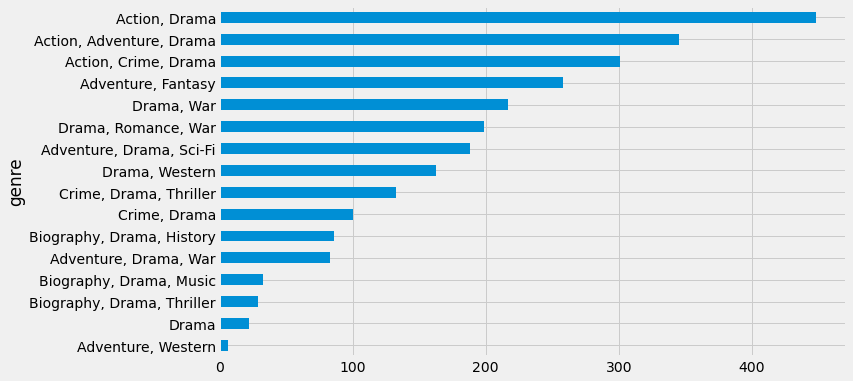

In [112]:
# We can plot the information here
(movies
     .query('run_time >= 150')
     .groupby('genre')['gross_total']
     .mean()
     .sort_values()
     .plot.barh());

### 4.4 Movies genre

In [109]:
# Let's the movies by genre, this column is quite interesting
# Because almost all movies combine a mininum of two types of genres
movies['genre']

0                   Crime, Drama
1         Crime, Drama, Thriller
2     Action, Adventure, Fantasy
3                          Drama
4                  Drama, Horror
                 ...            
94         Crime, Drama, Mystery
95                  Crime, Drama
96        Drama, Romance, Sci-Fi
97        Comedy, Drama, Romance
98                Action, Sci-Fi
Name: genre, Length: 99, dtype: object

In [92]:
# We have 99 different combinations, and this is not useful for analysis
movies['genre'].count()

99

In [108]:
# We can count for example how many times appears the Drama genre
movies['genre'].str.count('Drama').sum()

66

In [100]:
# A better approach could be use the function str.contains() with the specific genre
# This allows to see all the rows where the Drama genre appears
movies[movies['genre'].str.contains('Drama')]

,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
0,The Godfather,1972-01-01,R,175,"Crime, Drama",9.2,1860471,134.97
1,The Silence of the Lambs,1991-01-01,R,118,"Crime, Drama, Thriller",8.6,1435344,130.74
3,The Shawshank Redemption,1994-01-01,R,142,Drama,9.3,2683302,28.34
4,The Shining,1980-01-01,R,146,"Drama, Horror",8.4,1025560,44.02
5,Casablanca,1942-01-01,PG,102,"Drama, Romance, War",8.5,574092,1.02
...,...,...,...,...,...,...,...,...
93,Heat,1995-01-01,R,170,"Action, Crime, Drama",8.3,658033,67.44
94,The Usual Suspects,1995-01-01,R,106,"Crime, Drama, Mystery",8.5,1087832,23.34
95,Cool Hand Luke,1967-01-01,GP,127,"Crime, Drama",8.1,178888,16.22
96,Eternal Sunshine of the Spotless Mind,2004-01-01,R,108,"Drama, Romance, Sci-Fi",8.3,1011004,34.40


In [114]:
# Or maybe we could use three genres: Drama or Action or Adventure
movies[movies['genre'].str.contains('Drama|Action|Adventure')]

,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total
0,The Godfather,1972-01-01,R,175,"Crime, Drama",9.2,1860471,134.97
1,The Silence of the Lambs,1991-01-01,R,118,"Crime, Drama, Thriller",8.6,1435344,130.74
2,Star Wars: Episode V - The Empire Strikes Back,1980-01-01,PG,124,"Action, Adventure, Fantasy",8.7,1294805,290.48
3,The Shawshank Redemption,1994-01-01,R,142,Drama,9.3,2683302,28.34
4,The Shining,1980-01-01,R,146,"Drama, Horror",8.4,1025560,44.02
...,...,...,...,...,...,...,...,...
94,The Usual Suspects,1995-01-01,R,106,"Crime, Drama, Mystery",8.5,1087832,23.34
95,Cool Hand Luke,1967-01-01,GP,127,"Crime, Drama",8.1,178888,16.22
96,Eternal Sunshine of the Spotless Mind,2004-01-01,R,108,"Drama, Romance, Sci-Fi",8.3,1011004,34.40
97,City Lights,1931-01-01,G,87,"Comedy, Drama, Romance",8.5,186059,0.02


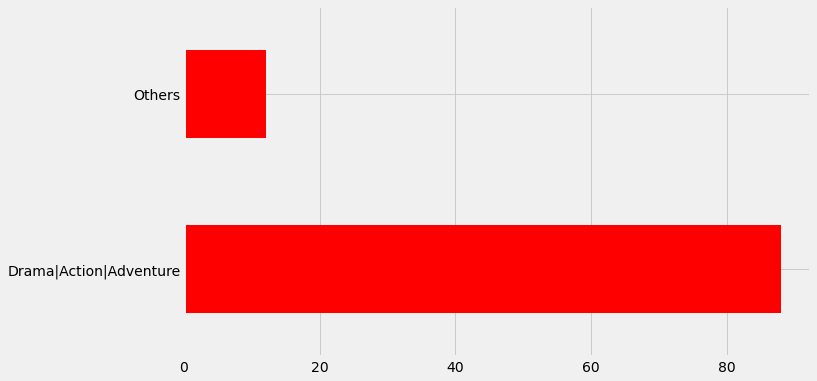

In [131]:
# The plot indicates the percentage of movies that contains the genres: Drama|Action|Adventure
(movies['genre'].str.contains('Drama|Action|Adventure')
                .value_counts(ascending=False, normalize=True)
                .rename({True: 'Drama|Action|Adventure', False: 'Others'})
                * 100).plot.barh(color='red');

### 4.5 Cluster Analysis - KMeans

In [141]:
# Let's perform a cluster analysis to see how data is divided based on numerical variables
from sklearn.cluster import KMeans

In [143]:
# select the variables that you want to use for clustering
features = ['run_time', 'imdb_rating', 'votes', 'gross_total']
X = movies[features]

In [144]:
# perform k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# add the cluster labels to your dataset
movies['cluster'] = kmeans.labels_

In [145]:
#print the number of observations in each cluster
movies['cluster'].value_counts()

1    49
0    36
2    14
Name: cluster, dtype: int64

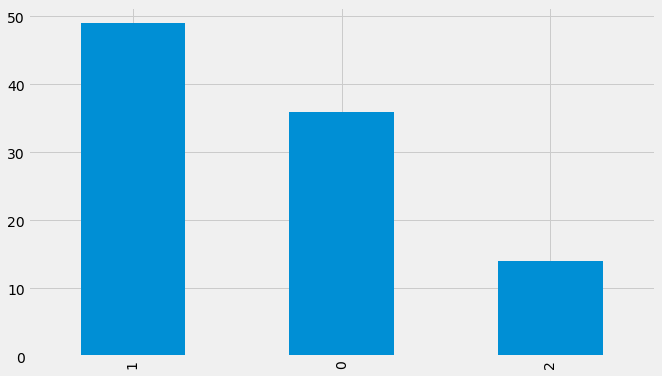

In [168]:
movies['cluster'].value_counts().plot.bar();

In [154]:
# Let's try to find out which variable defines the cluster
movies[movies['cluster'] == 2]

,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total,cluster
0,The Godfather,1972-01-01,R,175,"Crime, Drama",9.2,1860471,134.97,2
3,The Shawshank Redemption,1994-01-01,R,142,Drama,9.3,2683302,28.34,2
8,The Lord of the Rings: The Return of the King,2003-01-01,PG-13,201,"Action, Adventure, Drama",9.0,1849082,377.85,2
10,The Dark Knight,2008-01-01,PG-13,152,"Action, Crime, Drama",9.0,2656768,534.86,2
14,Inception,2010-01-01,PG-13,148,"Action, Adventure, Sci-Fi",8.8,2356293,292.58,2
15,The Lord of the Rings: The Fellowship of the Ring,2001-01-01,PG-13,178,"Action, Adventure, Drama",8.8,1878557,315.54,2
19,Se7en,1995-01-01,R,127,"Crime, Drama, Mystery",8.6,1655745,100.13,2
22,The Lord of the Rings: The Two Towers,2002-01-01,PG-13,179,"Action, Adventure, Drama",8.8,1669715,342.55,2
28,Pulp Fiction,1994-01-01,R,154,"Crime, Drama",8.9,2058574,107.93,2
40,Forrest Gump,1994-01-01,PG-13,142,"Drama, Romance",8.8,2082477,330.25,2


In [156]:
movies[movies['cluster'] == 1].head(10)

,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total,cluster
5,Casablanca,1942-01-01,PG,102,"Drama, Romance, War",8.5,574092,1.02,1
12,Aliens,1986-01-01,R,137,"Action, Adventure, Sci-Fi",8.4,720623,85.16,1
17,Some Like It Hot,1959-01-01,Passed,121,"Comedy, Music, Romance",8.2,269346,25.00,1
18,Blade Runner,1982-01-01,R,117,"Action, Drama, Sci-Fi",8.1,773425,32.87,1
20,Apocalypse Now,1979-01-01,R,147,"Drama, Mystery, War",8.5,669994,83.47,1
21,12 Angry Men,1957-01-01,Approved,96,"Crime, Drama",9.0,792729,4.36,1
26,Gone with the Wind,1939-01-01,Passed,238,"Drama, Romance, War",8.2,317621,198.68,1
29,The Bridge on the River Kwai,1957-01-01,PG,161,"Adventure, Drama, War",8.2,222540,44.91,1
31,North by Northwest,1959-01-01,Approved,136,"Action, Adventure, Mystery",8.3,330232,13.28,1
32,Rear Window,1954-01-01,PG,112,"Mystery, Thriller",8.5,493926,36.76,1


In [157]:
movies[movies['cluster'] == 0].head(10)

,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total,cluster
1,The Silence of the Lambs,1991-01-01,R,118,"Crime, Drama, Thriller",8.6,1435344,130.74,0
2,Star Wars: Episode V - The Empire Strikes Back,1980-01-01,PG,124,"Action, Adventure, Fantasy",8.7,1294805,290.48,0
4,The Shining,1980-01-01,R,146,"Drama, Horror",8.4,1025560,44.02,0
6,One Flew Over the Cuckoo's Nest,1975-01-01,R,133,Drama,8.7,1010102,112.00,0
7,Indiana Jones and the Raiders of the Lost Ark,1981-01-01,PG,115,"Action, Adventure",8.4,969143,248.16,0
9,Star Wars: Episode IV - A New Hope,1977-01-01,PG,121,"Action, Adventure, Fantasy",8.6,1367430,322.74,0
11,The Godfather: Part II,1974-01-01,R,202,"Crime, Drama",9.0,1273349,57.30,0
13,Schindler's List,1993-01-01,R,195,"Biography, Drama, History",9.0,1357621,96.90,0
16,Alien,1979-01-01,R,117,"Horror, Sci-Fi",8.5,885635,78.90,0
23,Terminator 2: Judgment Day,1991-01-01,R,137,"Action, Sci-Fi",8.6,1101850,204.84,0


In [160]:
movies.groupby('cluster')['imdb_rating'].mean()

cluster
0    8.42
1    8.16
2    8.84
Name: imdb_rating, dtype: float64

In [161]:
# It seems that votes and imdb_rating are the variables who defines the clusters
# Plot the clusters with plotly
# create a scatter plot with color-coded clusters
fig = px.scatter(movies, x='imdb_rating', y='votes', color='cluster')
fig

# We have three levels: high votes, medium votes and low votes

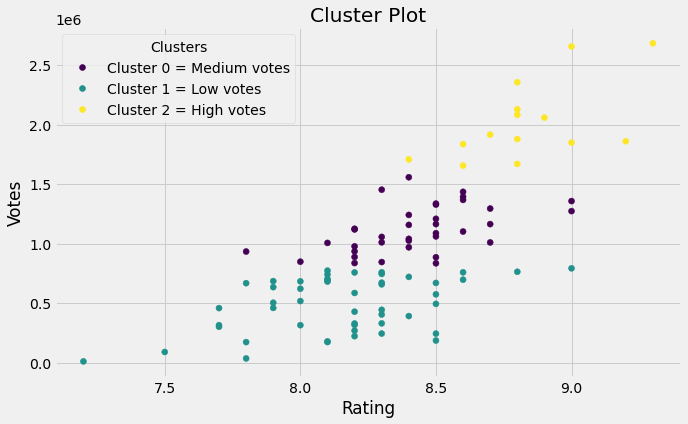

In [165]:
# This is easier to see with a scatter in matplotlib
# create a scatter plot with color-coded clusters
scatter = plt.scatter(movies['imdb_rating'], movies['votes'], c=movies['cluster'])

# add legend
legend = plt.legend(*scatter.legend_elements(), title="Clusters", loc="upper left")

# set legend labels
legend.get_texts()[2].set_text('Cluster 2 = High votes')
legend.get_texts()[0].set_text('Cluster 0 = Medium votes')
legend.get_texts()[1].set_text('Cluster 1 = Low votes')


# add axis labels and title
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Cluster Plot');

### 4.7 Cluster Analysis DBSCAN

In [175]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Select the variables to cluster
X = movies[['run_time', 'imdb_rating', 'votes', 'gross_total']]

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Create a DBSCAN object
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the data to the DBSCAN object
dbscan.fit(X_std)

# Extract the labels and core samples
labels = dbscan.labels_
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

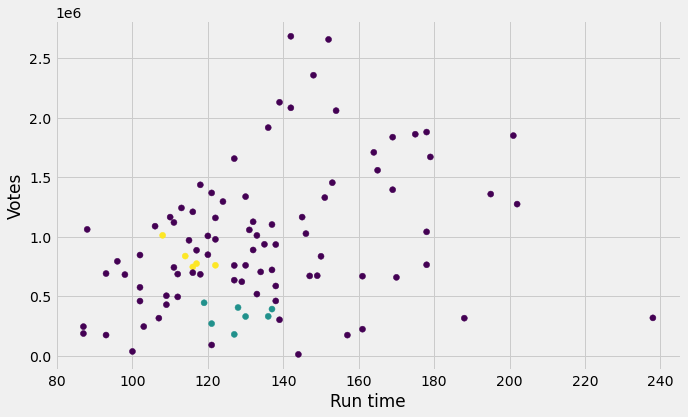

In [187]:
# We can plot the results of DBSCAN
# which are unlike the Kmeans method

plt.scatter(X['run_time'], X['votes'], c=labels)
plt.xlabel('Run time')
plt.ylabel('Votes')
plt.show()

In [182]:
# Let's add the DSCAN labels to our dataset
movies['dbscan'] = labels

In [194]:
# By default the method create three groups
# The problem here is that we have a very big group and two very small ones
movies['dbscan'].value_counts()

-1    87
 0     7
 1     5
Name: dbscan, dtype: int64

In [185]:
# Going a little deeper into the data, we can see that both groups have a low gross total and almost the same rating
movies[movies['dbscan'] == 0]

,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total,cluster,dbscan
17,Some Like It Hot,1959-01-01,Passed,121,"Comedy, Music, Romance",8.2,269346,25.00,-1,0
31,North by Northwest,1959-01-01,Approved,136,"Action, Adventure, Mystery",8.3,330232,13.28,-1,0
35,Citizen Kane,1941-01-01,PG,119,"Drama, Mystery",8.3,444359,1.59,-1,0
60,The Lives of Others,2006-01-01,R,137,"Drama, Mystery, Thriller",8.4,391480,11.29,-1,0
63,Chinatown,1974-01-01,R,130,"Drama, Mystery, Thriller",8.2,329110,8.49,-1,0
69,Vertigo,1958-01-01,PG,128,"Mystery, Romance, Thriller",8.3,404626,3.20,-1,0
95,Cool Hand Luke,1967-01-01,GP,127,"Crime, Drama",8.1,178888,16.22,-1,0


In [190]:
movies[movies['dbscan'] == 1]

,movie_name,year_of_release,category,run_time,genre,imdb_rating,votes,gross_total,cluster,dbscan
18,Blade Runner,1982-01-01,R,117,"Action, Drama, Sci-Fi",8.1,773425,32.87,-1,1
27,Taxi Driver,1976-01-01,R,114,"Crime, Drama",8.2,836871,28.26,-1,1
50,Amélie,2001-01-01,R,122,"Comedy, Romance",8.3,759411,33.23,-1,1
53,Full Metal Jacket,1987-01-01,R,116,"Drama, War",8.3,745546,46.36,-1,1
96,Eternal Sunshine of the Spotless Mind,2004-01-01,R,108,"Drama, Romance, Sci-Fi",8.3,1011004,34.40,-1,1


### 4.8 Agglomerative Clustering

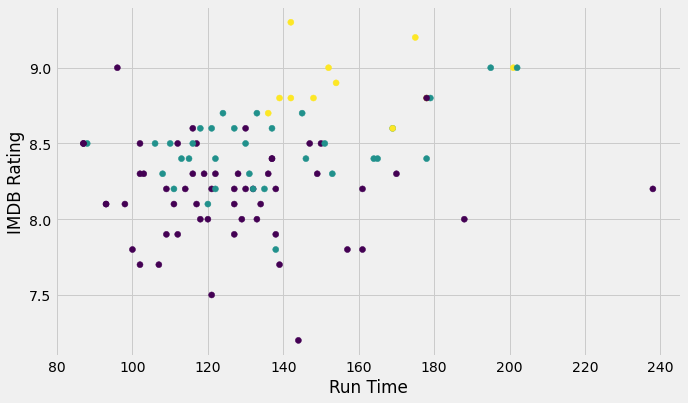

In [203]:
from sklearn.cluster import AgglomerativeClustering

# Select the variables to cluster
X = movies[['run_time', 'imdb_rating', 'votes', 'gross_total']]

# Create an Agglomerative Clustering object
agg_clustering = AgglomerativeClustering(n_clusters=3)

# Fit the data to the Agglomerative Clustering object
agg_clustering.fit(X)

# Extract the labels
labelsagg = agg_clustering.labels_

# Plot the results
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labelsagg)
plt.xlabel('Run Time')
plt.ylabel('IMDB Rating')
plt.show()

# This method is not very useful, because it mix almost all the categories

In [204]:
movies['Agglomerative'] = labelsagg

In [205]:
movies['Agglomerative'].value_counts()

0    55
1    33
2    11
Name: Agglomerative, dtype: int64